# HR Analytics

Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

Reading Data

In [2]:
data=pd.read_csv(r'train_LZdllcl.csv')
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Data Pre-Processing

In [3]:
data.shape

(54808, 14)

Checking for duplicated rows 

In [4]:
data.duplicated().sum()

0

Checking the co-relation between columns

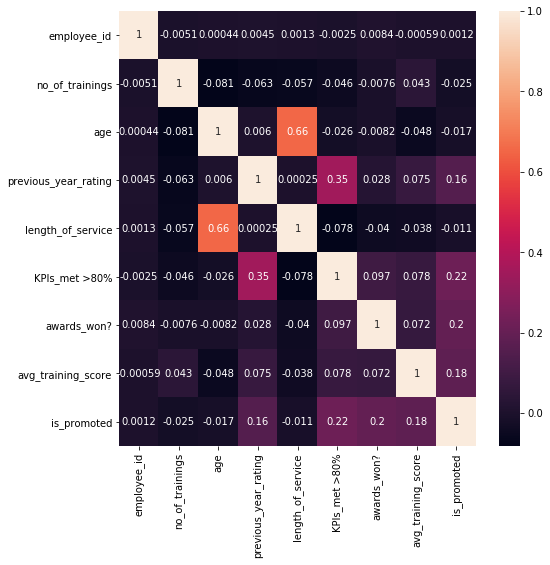

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data.corr(), annot = True,ax=ax)

Thus it can be seen that age is co-related to length of service and KPI>80% is related to the previous year ratings

previous_year_rating, KPI, awards_won and avg_training_score are compartively more related to the output label

In [6]:
data.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

Employee id has unique values for each row

Gender has only 2 values -male/female

previous_year_rating has only 5 values - 1.0 to 5.0

KPIs_met >80%  and awards_won?  has either true/false values i.e 0/1

Inference : No Constant columns are present

In [7]:
sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(data[['employee_id', 
        'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted']])

sum(sel.get_support())

9

No Quasi Constant columns present

Checking for null values

In [8]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [9]:
data['previous_year_rating'].isnull().groupby(data['length_of_service']).sum() 

length_of_service
1     4124.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
30       0.0
31       0.0
32       0.0
33       0.0
34       0.0
37       0.0
Name: previous_year_rating, dtype: float64

There are null values present in only those rows whose length of service=1 i.e for new employees.

In [10]:
data.previous_year_rating=data.previous_year_rating.fillna(0.0)

Thus imputing 0.0 as the null value for previous year rating as for new employees there is no previous year and thus no previous year rating

Checking for the null values in education column

In [11]:
data['education'].isnull().groupby(data['gender']).sum() 

gender
f     391.0
m    2018.0
Name: education, dtype: float64

In [12]:
data['education'].groupby(data['gender']).agg(pd.Series.mode)

gender
f    Bachelor's
m    Bachelor's
Name: education, dtype: object

In [13]:
data['education'].isnull().groupby(data['department']).sum() 

department
Analytics             337.0
Finance                36.0
HR                     32.0
Legal                   4.0
Operations            226.0
Procurement            72.0
R&D                    28.0
Sales & Marketing    1575.0
Technology             99.0
Name: education, dtype: float64

In [14]:
data['education'].groupby(data['department']).agg(pd.Series.mode)

department
Analytics            Bachelor's
Finance              Bachelor's
HR                   Bachelor's
Legal                Bachelor's
Operations           Bachelor's
Procurement          Bachelor's
R&D                  Bachelor's
Sales & Marketing    Bachelor's
Technology           Bachelor's
Name: education, dtype: object

In [15]:
data['education'].groupby(data['age']).agg(pd.Series.mode)

age
20          Bachelor's
21     Below Secondary
22     Below Secondary
23          Bachelor's
24          Bachelor's
25          Bachelor's
26          Bachelor's
27          Bachelor's
28          Bachelor's
29          Bachelor's
30          Bachelor's
31          Bachelor's
32          Bachelor's
33          Bachelor's
34          Bachelor's
35          Bachelor's
36          Bachelor's
37          Bachelor's
38          Bachelor's
39          Bachelor's
40          Bachelor's
41          Bachelor's
42    Master's & above
43          Bachelor's
44    Master's & above
45          Bachelor's
46          Bachelor's
47    Master's & above
48          Bachelor's
49          Bachelor's
50    Master's & above
51          Bachelor's
52          Bachelor's
53          Bachelor's
54    Master's & above
55          Bachelor's
56          Bachelor's
57    Master's & above
58    Master's & above
59    Master's & above
60          Bachelor's
Name: education, dtype: object

Found that the mode of education for some age group is different from Bachelor's thus we cannot directly use Bachelor's to fill nan

In [16]:
data.education=data.education.groupby(data['age']).fillna(data['education'].mode()[0])

Used a group by on age column to fill the nan with the mode of education in that particular age.

In [17]:
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

Now our dataset contains no null values. The data types of the columns are :

In [18]:
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

Checking for constant columns in the data set

In [19]:
data_transposed = data.T
data_transposed.duplicated().sum()

0

In [20]:
data['employee_id'].nunique()

54808

In [21]:
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

# Exploratory data analysis

In [22]:
#around 8.5% employees are promoted

data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [23]:
data.groupby('age')['is_promoted'].sum()

age
20      4
21      5
22     18
23     34
24     70
25     69
26    163
27    261
28    308
29    294
30    324
31    310
32    297
33    319
34    286
35    283
36    208
37    184
38    184
39    161
40    127
41    104
42     91
43     77
44     70
45     48
46     43
47     27
48     44
49     33
50     31
51     34
52     28
53     14
54     24
55     18
56     21
57      5
58     16
59     17
60     14
Name: is_promoted, dtype: int64

We can see that the more employees are promoted in the range of 30-40 and less in the range of 50-60

In [24]:
data['age_group']=(np.where(np.logical_and(data['age']>=20 ,data['age']<=30),1,
                            np.where(np.logical_and(data['age']>=31 ,data['age']<=40),2,
                             np.where(np.logical_and(data['age']>=41 ,data['age']<=50),3,
                             np.where(np.logical_and(data['age']>=51 ,data['age']<=60),4,
                              np.where(np.logical_and(data['age']>=61 ,data['age']<=70),5,np.nan)       )        )       )))

In [25]:
data['is_promoted'].groupby(data['age_group']).mean()

age_group
1.0    0.085550
2.0    0.090633
3.0    0.072727
4.0    0.066971
Name: is_promoted, dtype: float64

From the above analysis it is also clear that the employees belonging to the 2nd age group i.e 30-40 recieve more promotions compartively from the other age groups.

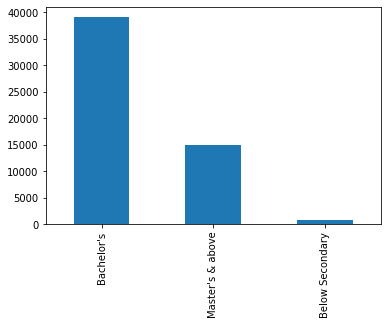

In [26]:
data['education'].value_counts().plot(kind='bar')

More number of employees have a Bachelor's degree and very few have Below Secondary type of education

In [27]:
data['education'].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

Text(0.5, 1.0, 'Count of number of employees present in various departments')

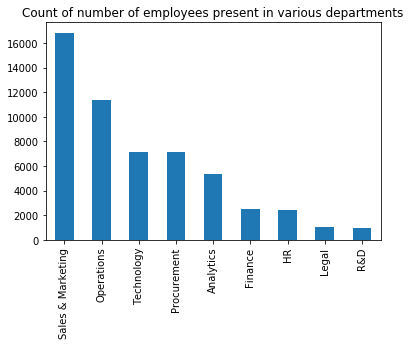

In [28]:
data['department'].value_counts().plot(kind='bar')
plt.title("Count of number of employees present in various departments")

There are more employees in the Sales and Marketing dept and very few in R&D

In [29]:
data['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

Text(0.5, 1.0, 'Count of number of employees promoted')

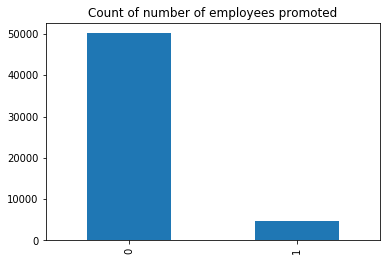

In [30]:
data['is_promoted'].value_counts().plot(kind='bar')
plt.title("Count of number of employees promoted")

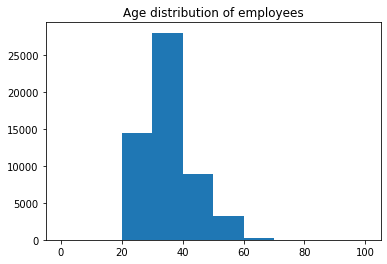

In [31]:
plt.hist(data['age'],bins=list(range(0,110,10)))
plt.title("Age distribution of employees")
plt.show()


Text(0.5, 1.0, 'Graph showing the trainings undergone by employees of different departments')

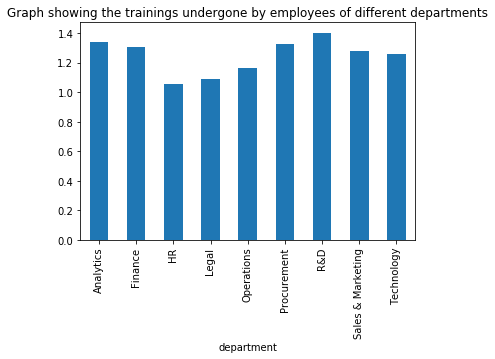

In [32]:
data.groupby('department')['no_of_trainings'].mean().plot(kind='bar')
plt.title("Graph showing the trainings undergone by employees of different departments")

Employees from R&D department undergo compartively more number of trainings than any other department

In [33]:
data.groupby('gender')['previous_year_rating'].mean()

gender
f    3.136341
m    3.054343
Name: previous_year_rating, dtype: float64

There is no significant trend in previous year rating with respect to the gender

In [34]:
data.groupby('length_of_service')['KPIs_met >80%'].sum()

length_of_service
1     1578
2     2495
3     2723
4     2660
5     2250
6     1751
7     2019
8      892
9      783
10     642
11     279
12     204
13     171
14     149
15     137
16     129
17      85
18      90
19      90
20      42
21      17
22      19
23      17
24      11
25      13
26       9
27       9
28       9
29       4
30       2
31       3
32       3
33       4
34       2
37       0
Name: KPIs_met >80%, dtype: int64

It can be seen that the the employees whose length of service is 1-10 have a larger probability of KPI's meeting 80%

In [35]:
data['length_of_service_group']=np.where(np.logical_and(data['length_of_service']>=1 ,data['length_of_service']<=10),1,
                                         np.where(np.logical_and(data['length_of_service']>=11 ,data['length_of_service']<=20),2,
                            np.where(np.logical_and(data['length_of_service']>=21 ,data['length_of_service']<=30),3,
                             np.where(np.logical_and(data['length_of_service']>=31 ,data['length_of_service']<=40),4,np.nan))))

In [36]:
data['is_promoted'].groupby(data['length_of_service_group']).mean()

length_of_service_group
1.0    0.086280
2.0    0.078055
3.0    0.052743
4.0    0.068182
Name: is_promoted, dtype: float64

There is a very high probability that if the length of service is between 10-20 years the employee will get a promotion

In [37]:
data.groupby('gender')['avg_training_score'].mean()

gender
f    63.889897
m    63.173550
Name: avg_training_score, dtype: float64

The average training score for both the genders dont show any significant pattern

In [38]:
data.groupby('gender')['department'].value_counts()

gender  department       
f       Operations            4677
        Procurement           3287
        Sales & Marketing     3154
        Technology            2788
        HR                    1006
        Finance                681
        Analytics              513
        Legal                  149
        R&D                     57
m       Sales & Marketing    13686
        Operations            6671
        Analytics             4839
        Technology            4350
        Procurement           3851
        Finance               1855
        HR                    1412
        R&D                    942
        Legal                  890
Name: department, dtype: int64

There are more male employees in Sales & Marketing dept and more females in Operations department

In [39]:
data[['no_of_trainings','age','length_of_service','avg_training_score']].describe()

,no_of_trainings,age,length_of_service,avg_training_score
count,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,5.865512,63.386750
std,0.609264,7.660169,4.265094,13.371559
min,1.000000,20.000000,1.000000,39.000000
25%,1.000000,29.000000,3.000000,51.000000
50%,1.000000,33.000000,5.000000,60.000000
75%,1.000000,39.000000,7.000000,76.000000
max,10.000000,60.000000,37.000000,99.000000


The average age of employees is 34

average length of service is 5 years whereas there is an employee who has worked for 37 years

the average training score of an employee is 63 with minimum being 39

In [40]:
data['department'].groupby(data['recruitment_channel']).value_counts()

recruitment_channel  department       
other                Sales & Marketing    9290
                     Operations           6279
                     Procurement          4002
                     Technology           3914
                     Analytics            2973
                     Finance              1463
                     HR                   1380
                     Legal                 590
                     R&D                   555
referred             Technology            342
                     Sales & Marketing     259
                     Operations            238
                     HR                    103
                     Analytics              83
                     Procurement            79
                     R&D                    19
                     Legal                  14
                     Finance                 5
sourcing             Sales & Marketing    7291
                     Operations           4831
                     

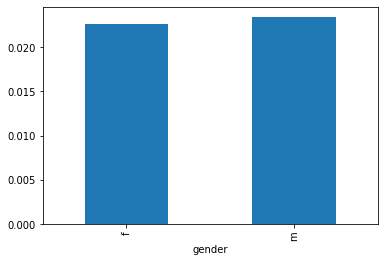

In [41]:
data['awards_won?'].groupby(data['gender']).mean().plot(kind='bar')

The probability of males winning an award is slightly higher

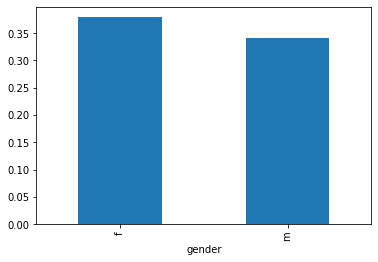

In [42]:
data['KPIs_met >80%'].groupby(data['gender']).mean().plot(kind='bar')

Probability of KPI meeting 80% is slightly higher for females

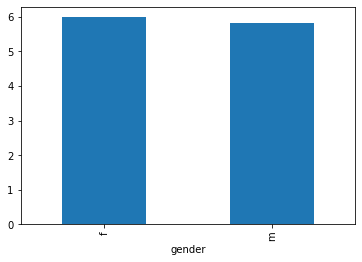

In [43]:
data['length_of_service'].groupby(data['gender']).mean().plot(kind='bar')

No significant trend in the length of service i.e males and females work for equal span of years

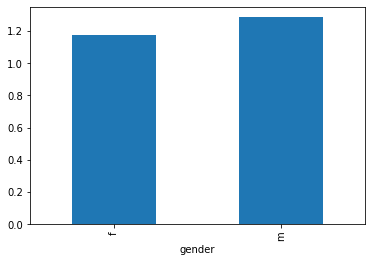

In [44]:
data['no_of_trainings'].groupby(data['gender']).mean().plot(kind='bar')

Males do compartively more number of trainings than females

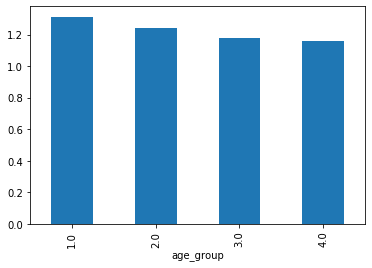

In [45]:
data['no_of_trainings'].groupby(data['age_group']).mean().plot(kind='bar')

People of age group 1 i.e of age (20-30) years undergo more number of trainings

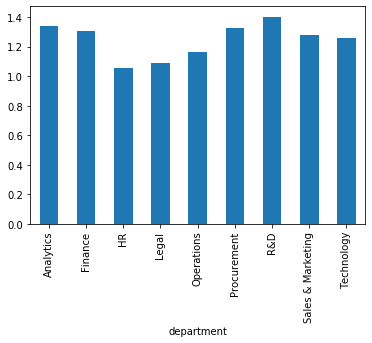

In [46]:
data['no_of_trainings'].groupby(data['department']).mean().plot(kind='bar')

Employees of the R&D department undergo more number of trainings

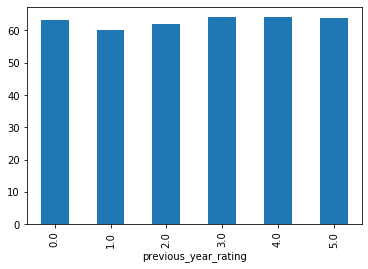

In [47]:
data['avg_training_score'].groupby(data['previous_year_rating']).mean().plot(kind='bar')

Traning score is not significantly dependent on previous year ratings

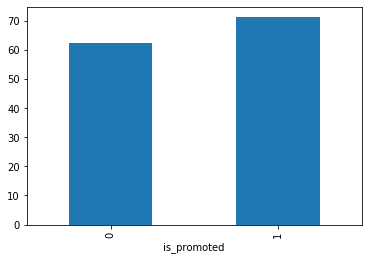

In [48]:
data['avg_training_score'].groupby(data['is_promoted']).mean().plot(kind='bar')

Training score is somewhat dependent on whether the employee will be promoted of not.. Employees with a comparively higher average training score are promoted

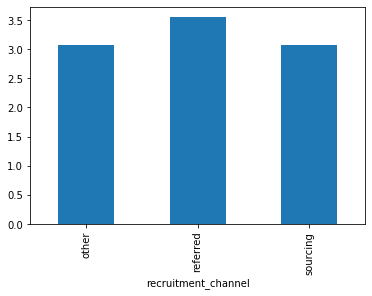

In [49]:
data['previous_year_rating'].groupby(data['recruitment_channel']).mean().plot(kind='bar')

The mean previous year rating is higher if the recruitment channel is referred

In [50]:
data['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

whereas the count of referred type is the least i.e it is a rare label

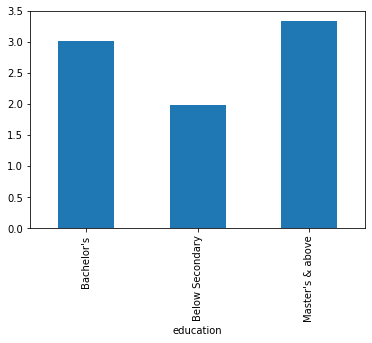

In [51]:
data['previous_year_rating'].groupby(data['education']).mean().plot(kind='bar')

The average ratings of Education type Master's and above is higher than the avg ratings of Bachelor's or Below Secondary type

In [52]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'age_group',
       'length_of_service_group'],
      dtype='object')

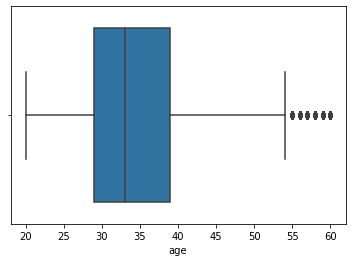

In [53]:
sns.boxplot(x=data['age'])

We can see that the age data contains outliers, but in actual they are not outliers because the above plot just shows that the age of certain old employees is far from the median age and since there are less number of old employees it is interpreted as an outliers but in actual it is not

In [54]:
data[data['length_of_service']==37]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,age_group,length_of_service_group
31071,51576,Sales & Marketing,region_2,Bachelor's,m,sourcing,2,60,5.0,37,0,0,48,0,4.0,4.0


It can be seen that the employee whose length of service is 37 is of age 60 i.e it is not an outlier.

# Splitting the dataset into Train and Validation Sets

In [55]:
from sklearn.model_selection import train_test_split

X_train,X_validation=train_test_split(data,random_state=1,test_size=0.3)

X_train.shape, X_validation.shape

((38365, 16), (16443, 16))

# Feature Engineering 

In [56]:
X_train.dtypes

employee_id                  int64
department                  object
region                      object
education                   object
gender                      object
recruitment_channel         object
no_of_trainings              int64
age                          int64
previous_year_rating       float64
length_of_service            int64
KPIs_met >80%                int64
awards_won?                  int64
avg_training_score           int64
is_promoted                  int64
age_group                  float64
length_of_service_group    float64
dtype: object

We can use a mapping function to map the gender in the following way so as to change the datatype to integer type

In [57]:
X_train['gender_map'] = X_train.gender.map({'f':0, 'm':1})
X_validation['gender_map'] = X_validation.gender.map({'f':0, 'm':1})

In [58]:
X_train['education'].unique()

array(["Bachelor's", "Master's & above", 'Below Secondary'], dtype=object)

Now since in our education column there are only 3 unique columns and these 3 values have an ordinal relationship between them so i label encoded the values in these columns

In [59]:
X_train['education_map']=X_train.education.map({'Below Secondary':1,"Bachelor's":2,"Master's & above":3})
X_validation['education_map']=X_validation.education.map({'Below Secondary':1,"Bachelor's":2,"Master's & above":3})

Taking the mean of whether the employee is promoted or not by grouping on the region column so that we can replace this in the original dataset using a map function.

Also known as Mean Target Encoding

In [60]:
X_train['region'].unique()

array(['region_7', 'region_2', 'region_32', 'region_18', 'region_22',
       'region_30', 'region_11', 'region_15', 'region_16', 'region_13',
       'region_17', 'region_14', 'region_8', 'region_24', 'region_12',
       'region_1', 'region_28', 'region_25', 'region_23', 'region_3',
       'region_26', 'region_31', 'region_29', 'region_4', 'region_34',
       'region_9', 'region_21', 'region_6', 'region_19', 'region_10',
       'region_20', 'region_27', 'region_5', 'region_33'], dtype=object)

In [61]:
region_numerical=data.region.apply(lambda x:x[7:])
region_numerical=region_numerical.astype(int)
region_numerical.unique()

array([ 7, 22, 19, 23, 26,  2, 20, 34,  1,  4, 29, 31, 15, 14, 11,  5, 28,
       17, 13, 16, 25, 10, 27, 30, 12, 21,  8, 32,  6, 33, 24,  3,  9, 18])

Why Slicing the column is not the right process ?

slicing the region column will create values such as 2,17,30 etc

When we will train our model, it will get biased towards the larger values like 30

where as it is possible that people of region_2 are more subjected to promotion

So we cannot use this method for encoding the region column

Hence Mean target encoding this column as well

In [62]:
region_encoding=X_train.groupby('region')['is_promoted'].mean()
region_encoding

region
region_1     0.087886
region_10    0.083700
region_11    0.059146
region_12    0.076705
region_13    0.091599
region_14    0.076014
region_15    0.078657
region_16    0.069498
region_17    0.139265
region_18    0.000000
region_19    0.059968
region_2     0.081370
region_20    0.064356
region_21    0.037931
region_22    0.111581
region_23    0.117717
region_24    0.032698
region_25    0.122807
region_26    0.062056
region_27    0.078925
region_28    0.117521
region_29    0.043415
region_3     0.088608
region_30    0.101322
region_31    0.049131
region_32    0.047840
region_33    0.047368
region_34    0.035176
region_4     0.154742
region_5     0.041591
region_6     0.040254
region_7     0.106182
region_8     0.077778
region_9     0.023810
Name: is_promoted, dtype: float64

Using these values to map to the train data set

These values which are calculated using data from only the train data set are mapped to the validation set

Because validation set should be unseen data thus while finding the mean encodings only the train part was used.

In [63]:
X_train['region_encoding']=X_train['region'].map(region_encoding)
X_validation['region_encoding']=X_validation['region'].map(region_encoding)

Using region numerical column for encoding will result in biasing of the model. This wont happen if we take the mean of the is_promoted column grouped on region (MEAN TAREGT ENCODING)

Similarly using only the train data set to find the mean target encoding of department column

In [64]:
department_encoding=X_train.groupby('department')['is_promoted'].mean()
department_encoding

department
Analytics            0.093216
Finance              0.084515
HR                   0.058551
Legal                0.045643
Operations           0.088025
Procurement          0.100712
R&D                  0.067251
Sales & Marketing    0.072439
Technology           0.109720
Name: is_promoted, dtype: float64

And then mapping these values to train as well as the validation set

In [65]:
X_train['department_enocding']=X_train['department'].map(department_encoding)
X_validation['department_enocding']=X_validation['department'].map(department_encoding)

In [66]:
X_train.shape,X_validation.shape

((38365, 20), (16443, 20))

Creating Some new features :

awards won and KPI's met have only true/false values i.e 0,1 and previous year ratings have values from 0-5

So if we add these columns together and then check the dependancy of this column with the target it can be seen as in the graph shown below.

In [67]:
X_train['performance_sum']=X_train['awards_won?']+X_train['KPIs_met >80%']+X_train['previous_year_rating']
X_validation['performance_sum']=X_validation['awards_won?']+X_validation['KPIs_met >80%']+X_validation['previous_year_rating']

#these 3 columns can be summed up to create a single column and 
#then we can observe the promotion dependent on this column

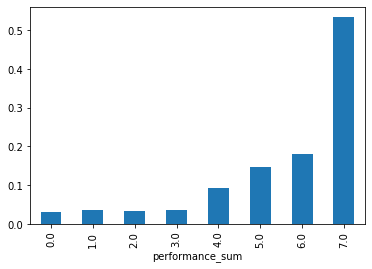

In [68]:
X_train['is_promoted'].groupby(X_train['performance_sum']).mean().plot(kind='bar')

As it can be seen that as the performance sum increases i.e after 4.0, the promotions go on increasing

So this column might be an important feature

Inference: Employees with high performace sum have a very high probability of getting promoted
    

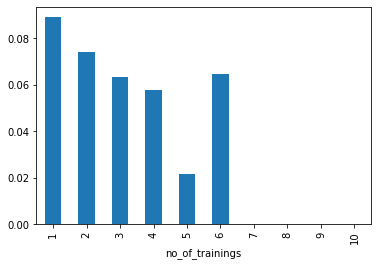

In [69]:
X_train['is_promoted'].groupby(X_train['no_of_trainings']).mean().plot(kind='bar')

It can be seen that employees who have done (1-4) number of trainings are more likely to get promoted

Inference: Employees who have done more than 6 number of trainings wont get promotion
    

We have 2 columns avg_training_score and no_of_trainings

If we multiply these columns then we can obtain the total_training points(not exact but almost) scored by an employee

In [70]:
X_train['total_training_points']=X_train['avg_training_score']*X_train['no_of_trainings']
X_validation['total_training_points']=X_validation['avg_training_score']*X_validation['no_of_trainings']

#we can calculate the total training points by multiplying the above 2 columns
#hence instead of using 2 columns, we can use only one

In [71]:
X_train['total_training_points'].describe()

count    38365.000000
mean        79.667197
std         43.742745
min         39.000000
25%         53.000000
50%         64.000000
75%         84.000000
max        710.000000
Name: total_training_points, dtype: float64

So the average training points were 79, minimum is 39 and maximum is 84

Now lets see the dependancy of a high training point with the output label 

In [72]:
X_train[X_train['total_training_points']>=500][['no_of_trainings','avg_training_score','is_promoted']]

,no_of_trainings,avg_training_score,is_promoted
19960,9,68,0
30936,10,71,0
548,7,82,0
9862,8,68,0
29372,9,71,0
52765,9,75,0
20778,8,71,0


Inference: It is not necessary that if the employee has a very high training score then the employee will be promoted for sure
    
    The promotion depends on lot more criterias 

Fos instance an employee may get a promotion if his score is around 100

In [73]:
X_filtered=X_train[X_train['total_training_points']>=90]
X_filtered=X_filtered[X_filtered['total_training_points']<=100]
X_filtered[['no_of_trainings','avg_training_score','total_training_points','is_promoted']]
print(X_filtered['is_promoted'].sum())
X_filtered.shape

374


(1520, 22)

Thus it can be seen that if the total_training_points lies more about the average then the employee has a chance of getting a promotion

374 promotions out of 1520

almost a 1:5 ratio


Now since we have 2 columns namely age and length of service

In the EDA it was seen that the employees belonging to age group 30-40 recieve compartively more promotions

and the employees whose length of service is 10-20 years recieve compartively more promotions

If we subtract length of service from age we will get the joining age of the employee

Then we can see how this joining age will be dependant on the promotion

In [74]:
X_train['joining_age']=X_train['age']-X_train['length_of_service']
X_validation['joining_age']=X_validation['age']-X_validation['length_of_service']

#Instead of using both the columns
#we can use only 1 column i.e joining age

In [75]:
X_train['joining_age'].min(),X_train['joining_age'].max()

(18, 58)

In [76]:
X_train['joining_age_bins']=np.where(np.logical_and(X_train['joining_age']>=10 ,X_train['joining_age']<=20),1,
                                         np.where(np.logical_and(X_train['joining_age']>=21 ,X_train['joining_age']<=30),2,
                            np.where(np.logical_and(X_train['joining_age']>=31 ,X_train['joining_age']<=40),3,
                             np.where(np.logical_and(X_train['joining_age']>=41 ,X_train['joining_age']<=50),4,
                                     np.where(np.logical_and(X_train['joining_age']>51 ,X_train['joining_age']<=60),5,np.nan)))))

In [77]:
X_train['is_promoted'].groupby(X_train['joining_age_bins']).mean()

joining_age_bins
1.0    0.059748
2.0    0.087185
3.0    0.086137
4.0    0.064786
5.0    0.086294
Name: is_promoted, dtype: float64

Thus it can be seen that the employees whose joining age is between 21-40 have a high probability of getting promotion

In [78]:
X_train['is_promoted'].groupby(X_train['education']).mean()

education
Bachelor's          0.080340
Below Secondary     0.084211
Master's & above    0.099321
Name: is_promoted, dtype: float64

The probability of getting promoted increases as the education level increases.

Thus Label Encoding the education column might be helpful during feature selection

In [79]:
X_train['is_promoted'].groupby(X_train['gender']).mean()

gender
f    0.090621
m    0.083448
Name: is_promoted, dtype: float64

No significant changes observed i.e the promotion is not biased towards gender, So mapping the gender may not be an important feature

In [80]:
recruitment_channel_encoding=X_train['is_promoted'].groupby(X_train['recruitment_channel']).mean()
recruitment_channel_encoding

recruitment_channel
other       0.083731
referred    0.131086
sourcing    0.085755
Name: is_promoted, dtype: float64

In [81]:
X_train['recruitment_channel'].value_counts()

other       21390
sourcing    16174
referred      801
Name: recruitment_channel, dtype: int64

The count of referred is very low compared to others

But the probability of getting promoted of refrred type is the highest


Thus using a mean target encoding for this column may be useful

In [82]:
X_train['recruitment_channel_encoding']=X_train['recruitment_channel'].map(recruitment_channel_encoding)
X_validation['recruitment_channel_encoding']=X_validation['recruitment_channel'].map(recruitment_channel_encoding)

In [83]:
X_train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'age_group',
       'length_of_service_group', 'gender_map', 'education_map',
       'region_encoding', 'department_enocding', 'performance_sum',
       'total_training_points', 'joining_age', 'joining_age_bins',
       'recruitment_channel_encoding'],
      dtype='object')

In [84]:
X_train.shape,X_validation.shape

((38365, 25), (16443, 24))

In [85]:
X_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,length_of_service_group,gender_map,education_map,region_encoding,department_enocding,performance_sum,total_training_points,joining_age,joining_age_bins,recruitment_channel_encoding
51189,36289,HR,region_7,Bachelor's,f,other,1,29,0.0,1,...,1.0,0,2,0.106182,0.058551,1.0,52,28,2.0,0.083731
35949,28978,Sales & Marketing,region_2,Master's & above,f,sourcing,1,44,5.0,11,...,2.0,0,3,0.081370,0.072439,6.0,47,33,3.0,0.085755
36385,38523,Sales & Marketing,region_32,Bachelor's,m,sourcing,1,30,3.0,3,...,1.0,1,2,0.047840,0.072439,3.0,50,27,2.0,0.085755
43913,39202,Technology,region_2,Master's & above,f,other,1,44,5.0,15,...,2.0,0,3,0.081370,0.109720,6.0,75,29,2.0,0.083731
9289,17245,Operations,region_7,Bachelor's,m,sourcing,1,34,3.0,7,...,1.0,1,2,0.106182,0.088025,3.0,61,27,2.0,0.085755


In [86]:
X_train.shape[0],X_train['employee_id'].nunique()

(38365, 38365)

Taking the numerical columns from X_train

i.e the new features, the old ones and encoded columns for the categorical variables

    Employee id is not used in features list because it is unique for each row i.e it will not give any insight about the dataset


In [87]:
features=[ 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'age_group',
       'length_of_service_group', 'gender_map', 'education_map',
       'region_encoding', 'department_enocding', 'performance_sum',
       'total_training_points', 'joining_age', 'recruitment_channel_encoding']

In [88]:
X_train[features].head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,age_group,length_of_service_group,gender_map,education_map,region_encoding,department_enocding,performance_sum,total_training_points,joining_age,recruitment_channel_encoding
51189,1,29,0.0,1,1,0,52,1.0,1.0,0,2,0.106182,0.058551,1.0,52,28,0.083731
35949,1,44,5.0,11,1,0,47,3.0,2.0,0,3,0.081370,0.072439,6.0,47,33,0.085755
36385,1,30,3.0,3,0,0,50,1.0,1.0,1,2,0.047840,0.072439,3.0,50,27,0.085755
43913,1,44,5.0,15,1,0,75,3.0,2.0,0,3,0.081370,0.109720,6.0,75,29,0.083731
9289,1,34,3.0,7,0,0,61,2.0,1.0,1,2,0.106182,0.088025,3.0,61,27,0.085755


Checking Variance Threshold to make sure that no quasi constant features were created during feature enigineering

In [89]:
sel = VarianceThreshold(threshold=0.1)  # 0.1 indicates 90% of observations approximately

sel.fit(X_train[features])

print ("Non quasi const features = ",sum(sel.get_support()))

print("Quasi Constant features =",
    len([
        x for x in X_train[features].columns
        if x not in X_train[features].columns[sel.get_support()]
    ]))

[x for x in X_train[features].columns if x not in X_train[features].columns[sel.get_support()]]

Non quasi const features =  13
Quasi Constant features = 4


['awards_won?',
 'region_encoding',
 'department_enocding',
 'recruitment_channel_encoding']

Some inferences about how variance works :

In [90]:
import statistics  
lis1=[1,2,1,2,1]
lis2=[0.1,0.2,0.1,0.2,0.1]
lis3=[0.1,0.1,0.1,0.1,0.1]
print(statistics.variance(lis1))
print(statistics.variance(lis2))
print(statistics.variance(lis3))

0.3
0.0030000000000000005
0.0


Thus we can see that if the data is 1,2... the variance is 0.3

But if the data changes to 0.1 i.e 10% of the orignal data , then the variance differs by 1/100(because of squared relation in the formula)

Now if we closely examine these columns :

In [91]:
X_train[['awards_won?',
 'region_encoding',
 'department_enocding',
 'recruitment_channel_encoding']].head()

,awards_won?,region_encoding,department_enocding,recruitment_channel_encoding
51189,0,0.106182,0.058551,0.083731
35949,0,0.081370,0.072439,0.085755
36385,0,0.047840,0.072439,0.085755
43913,0,0.081370,0.109720,0.083731
9289,0,0.106182,0.088025,0.085755


As it can be seen that in the above columns, the values present are in the form of 0.08, 0.05 etc

Hence the variance of these columns is very low(less than the threhold value)

This variance is low not because the the columns are quasi constant, but because the the values in these columns are low, and hence the variance is also low.

If i multiply the whole column by some weight say(100) , then it wont be considered as a quasi constnt column anymore by Variance Threshold

In [92]:
X_train['region_encoding']=X_train['region_encoding']*100

sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(X_train[features])

print ("Non quasi const features = ",sum(sel.get_support()))

print("Quasi constant features =",
    len([
        x for x in X_train[features].columns
        if x not in X_train[features].columns[sel.get_support()]
    ]))

[x for x in X_train[features].columns if x not in X_train[features].columns[sel.get_support()]]

Non quasi const features =  15
Quasi constant features = 2


['department_enocding', 'recruitment_channel_encoding']

In [93]:
#As it can be seen, region_encoding column is no more under quasi consnt columns

#reversing the changes made

X_train['region_encoding']=X_train['region_encoding']/100

I wont be multiplying any weights to these columns as I will be using a tree-based classifier in which scaling is not required

# Feature Selection

----------------------RFE with Random Forest----------------- 

Setting the class-weight as balanced because our dataset is an imbalanced dataset

max_depth signies the maximum depth of a decision tree

n_estimators=number of decision trees in Random Forest, setting it to 20 will speed up the process as the default value is 100.

After 20, the output remains the same, so increasing this value will only add overhead taking a lot of time to run

In [241]:
from sklearn.feature_selection import RFE

FS_RFE_model = RandomForestClassifier(class_weight='balanced', random_state=1,n_jobs=-1,max_depth=10,n_estimators=20)  

rfe = RFE(estimator=FS_RFE_model, n_features_to_select=7, step=1)
rfe=rfe.fit(X_train[features], X_train['is_promoted'])

print('Chosen best 7 features by rfe:',X_train[features].columns[rfe.support_])

Chosen best 7 features by rfe: Index(['previous_year_rating', 'KPIs_met >80%', 'avg_training_score',
       'region_encoding', 'department_enocding', 'performance_sum',
       'total_training_points'],
      dtype='object')


-------------------RFE with Random Forest and cross_validation-----------------------

using the scoring metric as F1 scoring

Setting the class-weight as balanced because our dataset is an imbalanced dataset

Using Repeated Stratified K-Fold since we have an imbalanced data set

Stratified K-Fold is used in case of imbalanced data set and Repeated is used as it Repeats Stratified K-Fold n times with different randomization in each repetition and will give a better performace

n_repeats is the number of repeats and n_splits is the number of folds i.e 10 fold cross validation in this case

Why scoring criteria is F1 and not accuracy ?

Since we have an imbalanced data set, the accuracy will always be high 

The F1 Score is the 2*((precision*recall)/(precision+recall)).

F1 score conveys the balance between the precision and the recall.

Precision talks about how precise the model is out of those predicted positive, how many of them are actual positive.

whereas

Recall calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive).

F1 Score is needed when we want to seek a balance between Precision and Recall

Thus F1 scoring will be used as scoring criteria in all the following models

In [99]:
from sklearn.feature_selection import RFECV

clf_rf_4 = RandomForestClassifier(class_weight='balanced', random_state=1,n_jobs=-1,max_depth=10,n_estimators=50) 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)


rfecv = RFECV(estimator=clf_rf_4, step=1, cv=cv,scoring='f1')  
rfecv = rfecv.fit(X_train[features], X_train['is_promoted'])

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train[features].columns[rfecv.support_])

Optimal number of features : 7
Best features : Index(['previous_year_rating', 'KPIs_met >80%', 'avg_training_score',
       'region_encoding', 'department_enocding', 'performance_sum',
       'total_training_points'],
      dtype='object')


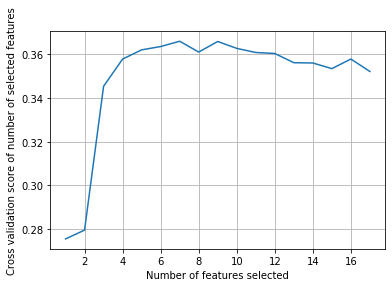

In [249]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.grid()
plt.show()

As we can see the optimal number of features obtained are 7 using 
Recursive Feature Elimnation with Cross-Validation

---------Sequential Feature Selector (Forward)-----------------

In [245]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# Build RF classifier to use in feature selection
clf = RandomForestClassifier(class_weight='balanced', random_state=1,n_jobs=-1,max_depth=10,n_estimators=50)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=(1,17),
           forward=True,
           floating=False,
           verbose=2,
           scoring='f1',
           cv=cv,n_jobs=-1) 

sfs1 = sfs1.fit(X_train[features], X_train['is_promoted'])


print("Selected Feature subset : ",sfs1.k_feature_names_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:  3.0min finished

[2020-07-27 19:59:30] Features: 1/17 -- score: 0.2754358534950247[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  3.4min finished

[2020-07-27 20:02:51] Features: 2/17 -- score: 0.28935765992456686[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.6min finished

[2020-07-27 20:06:28] Features: 3/17 -- score: 0.29583217797376327[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:  5.2min finished

[2020-07-27 20:11:39] Features: 4/17 -- score: 0.34965686201079516[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  6.3min remaini

Selected Feature subset :  ('previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'gender_map', 'region_encoding', 'department_enocding', 'total_training_points', 'joining_age')


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.2min finished

[2020-07-27 21:11:14] Features: 17/17 -- score: 0.35203414102138647

10 features were selected using this method

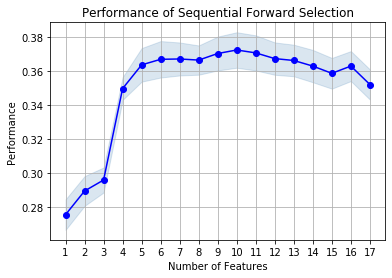

In [246]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig=plot_sfs(sfs1.get_metric_dict(),kind='std_dev')
plt.title("Performance of Sequential Forward Selection")
plt.grid()
plt.show()

From the above graph also it can be seen that the highest score was obtained at 10 features

Feature importance graph will be plotted later after model selection and fitting

Because I will be using another model(not Random Forest) for training the model

In [94]:
sfs_features=['previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 
              'avg_training_score', 'gender_map', 'region_encoding', 'department_enocding', 
              'total_training_points', 'joining_age']


rfe_features=['previous_year_rating', 'KPIs_met >80%',
       'avg_training_score', 'region_encoding', 'department_enocding',
       'performance_sum', 'total_training_points']

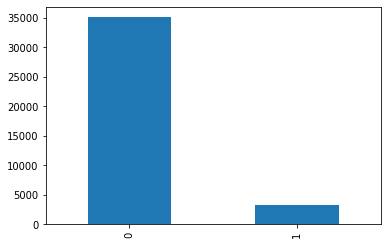

In [95]:
X_train['is_promoted'].value_counts().plot(kind='bar')

# Random Over Sampling 

Over Sampling is a process to increase the count of minority class

As in the above graph it can be seen that our dataset is highly imbalanced

So i will over-sample the minority class

Under Sampling may result in loss of some important inferences for the model

Thus I wont prefer under-sampling the dataset

On the other hand, over-sampling will not result in loss of any data rather just make the imbalance ratio compartively low for the model to train better

In [96]:
X=X_train[features]
y=X_train['is_promoted']
# summarize class distribution
print("Original Configuration :",Counter(y))


# define oversampling strategy
over = RandomOverSampler(sampling_strategy=0.3)
# fit and apply the transform
X, y = over.fit_resample(X, y)
# summarize class distribution
print("After Over Sampling of the minority class  :",Counter(y))


Original Configuration : Counter({0: 35082, 1: 3283})
After Over Sampling of the minority class  : Counter({0: 35082, 1: 10524})


Originally the ratio is around 10:1
    
After over sampling the ratio becomes 7:2
    
    i.e Compartively less imbalanced then the original class weights

This over-sampled data will be used later while training the model

# Model Training and Evaluation

In [97]:
import lightgbm
from sklearn.metrics import f1_score,accuracy_score,precision_score

# Over Sampling

In [98]:
over = RandomOverSampler(sampling_strategy=0.3,random_state=1)

X=X_train[sfs_features]
y=X_train['is_promoted']
X, y = over.fit_resample(X, y)

X_val=X_validation[sfs_features]
y_val=X_validation['is_promoted']
#X_val, y_val = over.fit_resample(X_val, y_val)

X.shape,y.shape,X_val.shape,y_val.shape

((45606, 10), (45606,), (16443, 10), (16443,))

Performed over sampling only on the train part for better model performance

Thus the dimension of Train data set increased from 35k to 45k

# Logistic Regresion

In [113]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X,y)
y_pred=model.predict(X_val)
y_pred=np.where(y_pred>0.5,1,0)
print("Classification Report = \n",classification_report(y_pred, y_val))

Classification Report = 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94     15263
           1       0.26      0.31      0.28      1180

    accuracy                           0.89     16443
   macro avg       0.60      0.62      0.61     16443
weighted avg       0.90      0.89      0.89     16443



Scores for class 1 are too low. Probably other models will give a better score

# Naive Bayes Classifier

In [112]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X,y)
y_pred=model.predict(X_val)
y_pred=np.where(y_pred>0.5,1,0)
print("Classification Report = \n",classification_report(y_pred, y_val))

Classification Report = 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94     15436
           1       0.24      0.34      0.28      1007

    accuracy                           0.90     16443
   macro avg       0.60      0.63      0.61     16443
weighted avg       0.91      0.90      0.90     16443



Still same.. No significant Result

# Random Forest Classifier

In [231]:
model=RandomForestClassifier(class_weight='balanced', random_state=1,n_jobs=-1,max_depth=10,n_estimators=50)
model.fit(X,y)
y_pred=model.predict(X_val)
print("Classification Report = \n",classification_report(y_pred, y_val))

Classification Report = 
               precision    recall  f1-score   support

           0       0.74      0.98      0.84     11289
           1       0.87      0.23      0.37      5154

    accuracy                           0.75     16443
   macro avg       0.81      0.61      0.61     16443
weighted avg       0.78      0.75      0.70     16443



Tree based models performed better 

Precision Scores are good

Still need to work on recall

Will try with some boosting algos

Feature: 0 previous_year_rating , Score: 0.10648
Feature: 1 length_of_service , Score: 0.02207
Feature: 2 KPIs_met >80% , Score: 0.31114
Feature: 3 awards_won? , Score: 0.05063
Feature: 4 avg_training_score , Score: 0.22101
Feature: 5 gender_map , Score: 0.00563
Feature: 6 region_encoding , Score: 0.04884
Feature: 7 department_enocding , Score: 0.11192
Feature: 8 total_training_points , Score: 0.09281
Feature: 9 joining_age , Score: 0.02946


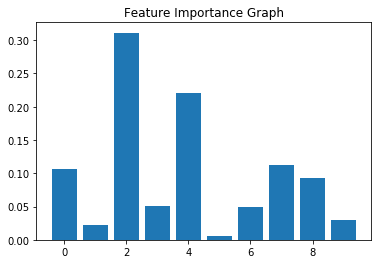

In [232]:
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d %0s , Score: %.5f' % (i,sfs_features[i],v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature Importance Graph")
plt.show()

# Adaboost

In [110]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=50,random_state=1)
model.fit(X,y)
y_pred=model.predict(X_val)
print("Classification Report = \n",classification_report(y_pred, y_val))

Classification Report = 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94     14941
           1       0.36      0.33      0.34      1502

    accuracy                           0.88     16443
   macro avg       0.65      0.64      0.64     16443
weighted avg       0.88      0.88      0.88     16443



No significant changes seen.. 

# XG Boost

Randomized Search for Hyper paramter tuning

In [115]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
model=xgboost.XGBClassifier()
model.fit(X,y)
y_pred=model.predict(X_val)
print("F1 score =",f1_score(y_pred,y_val))
print("Classification Report = \n",classification_report(y_pred, y_val))

F1 score = 0.5117157974300831
Classification Report = 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96     15182
           1       0.49      0.54      0.51      1261

    accuracy                           0.92     16443
   macro avg       0.73      0.75      0.73     16443
weighted avg       0.92      0.92      0.92     16443



Much better Performance than AdaBoost

But precision decreased and recall increased

Model Training using these hyper paramters

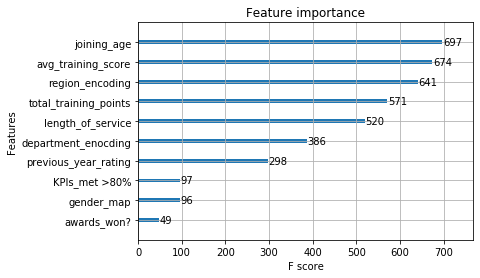

In [116]:
xgboost.plot_importance(model)

# Light GBM

In [99]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,classification_report
model=LGBMClassifier(n_jobs=-1, random_state=1)
model.fit(X,y)
y_pred=model.predict(X_val)
print("F1 score =",f1_score(y_pred,y_val))
print("Classification Report = \n",classification_report(y_pred, y_val))

F1 score = 0.5236514522821577
Classification Report = 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96     15418
           1       0.46      0.62      0.52      1025

    accuracy                           0.93     16443
   macro avg       0.71      0.78      0.74     16443
weighted avg       0.94      0.93      0.93     16443



Till far, the best score were seen in this model i.e Light GBM, so I will be using this model as my final model and further operations will be performed on this model

# Hyper Parameter Tuning using Randomized Search

In [128]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=np.arange(0,1500,100)
max_depth=np.arange(0,20,2)
learning_rate=[0.1,0,2,0.3,0.4,0.5]
hyperparameters=dict(n_estimators=n_estimators,max_depth=max_depth,learning_rate=learning_rate)
cv = StratifiedKFold(n_splits=10, random_state=1)
search = RandomizedSearchCV(model,hyperparameters, cv=cv,verbose=0,n_iter=50,n_jobs=-1,scoring="precision",random_state=1)
search.fit(X, y)
print ("Best n_estimators =",search.best_estimator_.get_params()['n_estimators'])
print ("Best max_depth =",search.best_estimator_.get_params()['max_depth'])
print ("Best Learning Rate =",search.best_estimator_.get_params()['learning_rate'])

Best n_estimators = 900
Best max_depth = 18
Best Learning Rate = 0.3


Minisiming the range of n_estimators and increasing max_depth

In [131]:
n_estimators=np.arange(800,1000,10)
max_depth=np.arange(15,30,2)
hyperparameters=dict(n_estimators=n_estimators,max_depth=max_depth)
cv = StratifiedKFold(n_splits=10, random_state=1)
search = RandomizedSearchCV(model,hyperparameters, cv=cv,verbose=0,n_iter=20,n_jobs=-1,scoring="precision",random_state=1)
search.fit(X, y)
print ("Best n_estimators =",search.best_estimator_.get_params()['n_estimators'])
print ("Best max_depth =",search.best_estimator_.get_params()['max_depth'])

Best n_estimators = 990
Best max_depth = 19


Using this max_depth value to get best n_estimators

In [144]:
n_estimators=np.arange(800,1200,50)
hyperparameters=dict(n_estimators=n_estimators)
cv = StratifiedKFold(n_splits=10, random_state=1)
model=LGBMClassifier(n_jobs=-1, random_state=1,max_depth=19)
search = RandomizedSearchCV(model,hyperparameters, cv=cv,verbose=0,n_iter=20,n_jobs=-1,scoring="precision",random_state=1)
search.fit(X, y)
print ("Best n_estimators =",search.best_estimator_.get_params()['n_estimators'])
print ("Best max_depth =",search.best_estimator_.get_params()['max_depth'])

Best n_estimators = 1050
Best max_depth = 19


Using these hyper parameters in model

In [145]:
model=LGBMClassifier(objective="binary",n_estimators=1050,n_jobs=-1,  max_depth=19, random_state=1,learning_rate=0.3)
model.fit(X,y)
y_pred=model.predict(X_val)
print("F1 = ",f1_score(y_pred,y_val))
print("Accuracy = ",accuracy_score(y_pred,y_val))
print("Precision = ",precision_score(y_pred,y_val))

F1 =  0.47571606475716066
Accuracy =  0.9231891990512681
Precision =  0.41371841155234657


Precision decreased on hyper tuning 

The default value of n_estimators i.e 100 performs best

Thus I will be using that

Hypertuning max depth when n_estimators in 100

In [162]:
max_depth=np.arange(5,20)
hyperparameters=dict(max_depth=max_depth)
model=model=LGBMClassifier(n_jobs=-1, random_state=1,n_estimators=100)
cv = StratifiedKFold(n_splits=10, random_state=1)
model=LGBMClassifier(n_jobs=-1, random_state=1,max_depth=19)
search = RandomizedSearchCV(model,hyperparameters, cv=cv,verbose=0,n_iter=15,n_jobs=-1,scoring="f1",random_state=1)
search.fit(X, y)
print ("Best max_depth =",search.best_estimator_.get_params()['max_depth'])

Best max_depth = 12


In [163]:
model=LGBMClassifier(objective="binary",n_estimators=100,n_jobs=-1,  max_depth=12, random_state=1,learning_rate=0.3)
model.fit(X,y)
y_pred=model.predict(X_val)
print("F1 = ",f1_score(y_pred,y_val))
print("Accuracy = ",accuracy_score(y_pred,y_val))
print("Precision = ",precision_score(y_pred,y_val))

F1 =  0.4893455098934551
Accuracy =  0.9183847229824241
Precision =  0.4642599277978339


There is only 0.4 increase in precision and 2% decrease in accuracy 

Also F1 score decreased from 0.52 to 0.48

So I will prefer manually tuning the values and see if I get better results

Final Model ::

In [100]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score,accuracy_score,precision_score,recall_score,classification_report
model=LGBMClassifier(objective="binary",n_jobs=-1, random_state=1,max_depth=18)
#binary objective is used when there are only 2 classes
model.fit(X,y)
y_pred=model.predict(X_val)
print("F1 score =",f1_score(y_pred,y_val))
print("Classification Report = \n",classification_report(y_pred, y_val))

F1 score = 0.5236514522821577
Classification Report = 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96     15418
           1       0.46      0.62      0.52      1025

    accuracy                           0.93     16443
   macro avg       0.71      0.78      0.74     16443
weighted avg       0.94      0.93      0.93     16443



After manual tuning the values obtained for

max_depth =15

and default value i.e 100 was used for n_estimators

Feature importance graph can be seen as follows:

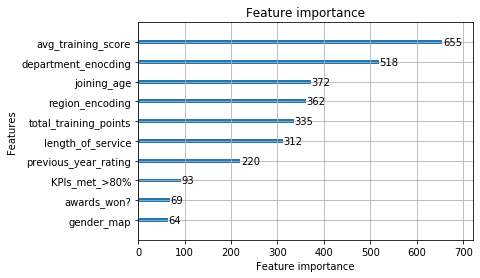

In [213]:
import lightgbm
lightgbm.plot_importance(model)

Evaluation Metrics :

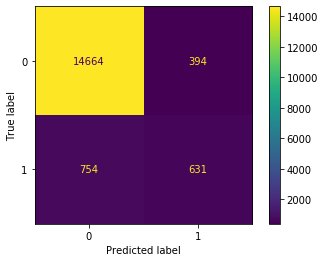

In [214]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_val, y_val)

ROC Score :

In [220]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_pred,y_val)

0.7833529387570436

Precision- Recall Curve

Precision-Recall curves should be used when there is a moderate to large class imbalance

Logistic: f1=0.524 auc=0.616


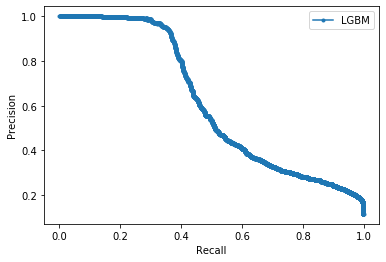

In [227]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
lr_probs = model.predict_proba(X_val)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(X_val)
lr_precision, lr_recall, _ = precision_recall_curve(y_val, lr_probs)
lr_f1, lr_auc = f1_score(y_val, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_val[y_val==1]) / len(y_val)
pyplot.plot(lr_recall, lr_precision, marker='.', label='LGBM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
pyplot.show()

# Cross-Validation on Light GBM Classifier

In [234]:
from sklearn.metrics import recall_score
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
scores = cross_val_score(model, X_val, y_val, scoring='f1', cv=cv, n_jobs=-1)
scores1 = cross_val_score(model, X_val, y_val, scoring='accuracy', cv=cv, n_jobs=-1)
scores2 = cross_val_score(model, X_val, y_val, scoring='precision', cv=cv, n_jobs=-1)
scores3 = cross_val_score(model, X_val, y_val, scoring='recall', cv=cv, n_jobs=-1)
print('F1 Score: %.3f' % mean(scores))
print('Accuracy Score: %.3f' % mean(scores1))
print('Precision Score: %.3f' % mean(scores2))
print('Recall Score: %.3f' % mean(scores3))

F1 Score: 0.503
Accuracy Score: 0.942
Precision Score: 0.909
Recall Score: 0.349


Scores obtained and good

Recall values are also satisfactory

# Test Data Set

In [102]:
test=pd.read_csv(r'test_2umaH9m.csv')
test.previous_year_rating=test.previous_year_rating.fillna(0.0)
test.education=test.education.groupby(data['age']).fillna(data['education'].mode()[0])
test['gender_map'] = test.gender.map({'f':0, 'm':1})
test['education_map']=test.education.map({'Below Secondary':1,"Bachelor's":2,"Master's & above":3})
test['region_encoding']=test['region'].map(region_encoding)
test['department_enocding']=test['department'].map(department_encoding)
test['performance_sum']=test['awards_won?']+test['KPIs_met >80%']+test['previous_year_rating']
test['total_training_points']=test['avg_training_score']*test['no_of_trainings']
test['joining_age']=test['age']-test['length_of_service']
test[sfs_features].shape

(23490, 10)

In [103]:
sub=model.predict(test[sfs_features])
sub

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [105]:
submission=pd.DataFrame({'employee_id':test['employee_id'],'is_promoted':sub})
submission=submission[['employee_id','is_promoted']]
submission.head()
submission.to_csv('submit.csv',index=False) 